In [1]:
import os
import pandas as pd
path = r"C:\Users\Wong\Desktop\Dissertation\Imputed_dataset"

Acomb_water = pd.read_csv(os.path.join(path, 'Acomb_water.csv'))
Acomb_rainfall = pd.read_csv(os.path.join(path, 'Acomb_rainfall.csv'))
Haltwhistle_rainfall = pd.read_csv(os.path.join(path, 'Haltwhistle_rainfall.csv'))
Haltwhistle_water = pd.read_csv(os.path.join(path, 'Haltwhistle_water.csv'))
Morpeth_water = pd.read_csv(os.path.join(path, 'Morpeth_water.csv'))
Morpeth_rainfall = pd.read_csv(os.path.join(path, 'Morpeth_rainfall.csv'))
Albermarle_rainfall = pd.read_csv(os.path.join(path, 'Albermarle_rainfall.csv'))
Riding_Mill_water = pd.read_csv(os.path.join(path, 'Riding_Mill_water.csv'))
Ridley_Mill_water = pd.read_csv(os.path.join(path, 'Ridley_Mill_water.csv'))

In [2]:
Acomb_water['dateTime'] = pd.to_datetime(Acomb_water['dateTime'])
Acomb_rainfall['dateTime'] = pd.to_datetime(Acomb_rainfall['dateTime'])
Haltwhistle_rainfall['dateTime'] = pd.to_datetime(Haltwhistle_rainfall['dateTime'])
Haltwhistle_water['dateTime'] = pd.to_datetime(Haltwhistle_water['dateTime'])
Morpeth_water['dateTime'] = pd.to_datetime(Morpeth_water['dateTime'])
Morpeth_rainfall['dateTime'] = pd.to_datetime(Morpeth_rainfall['dateTime'])
Albermarle_rainfall['dateTime'] = pd.to_datetime(Albermarle_rainfall['dateTime'])
Riding_Mill_water['dateTime'] = pd.to_datetime(Riding_Mill_water['dateTime'])
Ridley_Mill_water['dateTime'] = pd.to_datetime(Ridley_Mill_water['dateTime'])

In [3]:
Acomb_water.set_index('dateTime', inplace=True)
Acomb_rainfall.set_index('dateTime', inplace=True)
Haltwhistle_water.set_index('dateTime', inplace=True)
Haltwhistle_rainfall.set_index('dateTime', inplace=True)
Morpeth_water.set_index('dateTime', inplace=True)
Morpeth_rainfall.set_index('dateTime', inplace=True)
Albermarle_rainfall.set_index('dateTime', inplace=True)
Riding_Mill_water.set_index('dateTime', inplace=True)
Ridley_Mill_water.set_index('dateTime', inplace=True)

In [4]:
start_date = pd.to_datetime('01/01/2017 00:00:00', format='%d/%m/%Y %H:%M:%S')
end_date = pd.to_datetime('31/12/2020 00:00:00', format='%d/%m/%Y %H:%M:%S')
Acomb_water_subset = Acomb_water.loc[(Acomb_water.index >= start_date) & (Acomb_water.index <= end_date)]
Acomb_rainfall_subset = Acomb_rainfall.loc[(Acomb_rainfall.index >= start_date) & (Acomb_rainfall.index <= end_date)]

In [5]:
Acomb_water_subset.shape

(140161, 1)

In [6]:
Acomb_rainfall_subset.shape

(140161, 1)

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error
import tensorflow as tf
from keras import Model
from keras.layers import Input, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.layers import Dense, Dropout

In [8]:
merged_data = pd.merge(Acomb_rainfall_subset, Acomb_water_subset, on='dateTime', how='inner')

In [9]:
merged_data

,value_x,value_y
dateTime,,
2017-01-01 00:00:00,0.4,0.106
2017-01-01 00:15:00,0.2,0.109
2017-01-01 00:30:00,0.2,0.112
2017-01-01 00:45:00,0.2,0.116
2017-01-01 01:00:00,0.0,0.119
...,...,...
2020-12-30 23:00:00,0.0,0.086
2020-12-30 23:15:00,0.0,0.087
2020-12-30 23:30:00,0.0,0.086


In [10]:
train_merged, valid_merged, test_merged = merged_data[1:112128], merged_data[112128:126144],merged_data[126144:140161]

In [11]:
train_Acomb = train_merged
scalers_Acomb={}
for i in train_merged.columns:
    scaler = MinMaxScaler(feature_range=(-1,1))
    transform = scaler.fit_transform(train_Acomb[i].values.reshape(-1,1))
    transform=np.reshape(transform,len(transform))
    scalers_Acomb['scaler_'+ i] = scaler
    train_Acomb[i]=transform
test_Acomb = test_merged
for i in test_merged.columns:
    scaler = scalers_Acomb['scaler_'+i]
    transform = scaler.transform(test_Acomb[i].values.reshape(-1,1))
    transform=np.reshape(transform,len(transform))
    scalers_Acomb['scaler_'+i] = scaler
    test_Acomb[i]=transform
valid_Acomb = valid_merged
for i in valid_merged.columns:
    scaler = scalers_Acomb['scaler_'+i]
    transform = scaler.transform(valid_Acomb[i].values.reshape(-1,1))
    transform=np.reshape(transform,len(transform))
    scalers_Acomb['scaler_'+i] = scaler
    valid_Acomb[i]=transform

C:\Users\Wong\AppData\Local\Temp\ipykernel_20584\2528679520.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_Acomb[i]=transform
C:\Users\Wong\AppData\Local\Temp\ipykernel_20584\2528679520.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_Acomb[i]=transform
C:\Users\Wong\AppData\Local\Temp\ipykernel_20584\2528679520.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [12]:
def split(series, n_past, n_future):
    X, y = list(), list()
    for start in range(len(series)):
        p_end = start + n_past
        f_end = p_end + n_future
        if f_end > len(series):
            break
        past_window, future_window = series[start:p_end, :], series[p_end:f_end, :]
        X.append(past_window)
        y.append(future_window)
    return np.array(X), np.array(y)

In [13]:
n_past = 96
n_future = 48 
n_features = 2
X_train, y_train = split(train_Acomb.values,n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))
X_test, y_test = split(test_Acomb.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))
X_valid, y_valid = split(valid_Acomb.values,n_past, n_future)
X_valid = X_valid.reshape((X_valid.shape[0], X_valid.shape[1],n_features))
y_valid = y_valid.reshape((y_valid.shape[0], y_valid.shape[1], n_features))

In [15]:
e_in = tf.keras.layers.Input(shape=(n_past, n_features))
e_l1 = tf.keras.layers.LSTM(100,return_sequences = True, return_state=True)
e_outs1 = e_l1(e_in)
e_states1 = e_outs1[1:]
e_l2 = tf.keras.layers.LSTM(100, return_state=True)
e_outs2 = e_l2(e_outs1[0])
e_states2 = e_outs2[1:]

d_in = tf.keras.layers.RepeatVector(n_future)(e_outs2[0])

d_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(d_in,initial_state = e_states1)
d_l2 = tf.keras.layers.LSTM(100, return_sequences=True)(d_l1,initial_state = e_states2)
d_outs2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(d_l2)

model_e2d2 = tf.keras.models.Model(e_in,d_outs2)

model_e2d2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 96, 2)]      0           []                               
                                                                                                  
 lstm (LSTM)                    [(None, 96, 100),    41200       ['input_1[0][0]']                
                                 (None, 100),                                                     
                                 (None, 100)]                                                     
                                                                                                  
 lstm_1 (LSTM)                  [(None, 100),        80400       ['lstm[0][0]']                   
                                 (None, 100),                                                 

In [ ]:
reduce_learning_rate = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.90 ** x)
model_e2d2.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())
history_e2d2=model_e2d2.fit(X_train,y_train,epochs=50,validation_data=(X_valid,y_valid),batch_size=32,verbose=0,callbacks=[reduce_learning_rate])

In [19]:
from keras.models import load_model
model_e2d2.save('e2d2_v2.h5')

In [20]:
import pickle

with open('train_hist_e2d2_v2.pkl', 'wb') as file:
    pickle.dump(history_e2d2.history, file)

In [22]:
from keras.models import load_model
model_e2d2 = load_model('e2d2_v2.h5')

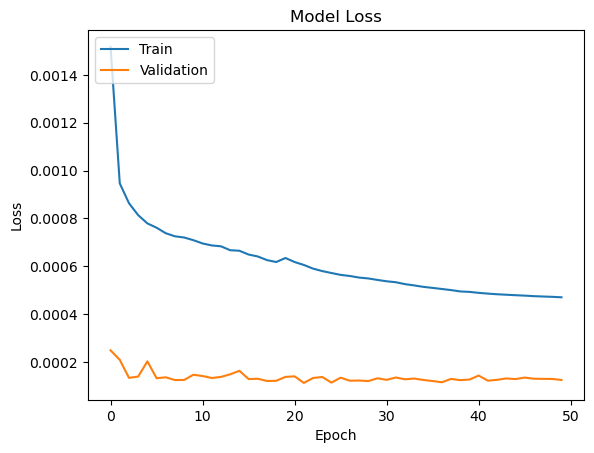

In [26]:
import matplotlib.pyplot as plt

plt.plot(history_e2d2.history['loss'])
plt.plot(history_e2d2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [23]:
pred_e2d2=model_e2d2.predict(X_test)

434/434 [==============================] - 24s 52ms/step


In [24]:
for index,i in enumerate(train_merged.columns):
    scaler = scalers_Acomb['scaler_'+i]
    pred_e2d2[:,:,index]=scaler.inverse_transform(pred_e2d2[:,:,index])
    y_train[:,:,index]=scaler.inverse_transform(y_train[:,:,index])
    y_test[:,:,index]=scaler.inverse_transform(y_test[:,:,index])
    y_valid[:,:,index]=scaler.inverse_transform(y_valid[:,:,index])

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np

def calculate_nse(y_true, y_pred):
    
    return 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)

for index, i in enumerate(train_merged.columns):
    print(i)
    for j in range(1, 49):
        print("time ", j, ":")
        mae_1 = mean_absolute_error(y_test[:, j - 1, index], pred_e2d2[:, j - 1, index])
        mse_1 = mean_squared_error(y_test[:, j - 1, index], pred_e2d2[:, j - 1, index])
        nse_1 = calculate_nse(y_test[:, j - 1, index], pred_e2d2[:, j - 1, index])
        print("MAE: ", mae_1)
        print("MSE: ", mse_1)
        print("NSE: ", nse_1)
    print()

value_x
time  1 :
MAE:  0.052293665776070905
MSE:  0.0166857799097444
NSE:  0.09511498836754806
time  2 :
MAE:  0.044243265436160376
MSE:  0.015222733507381602
NSE:  0.17445732465521147
time  3 :
MAE:  0.037454306737655214
MSE:  0.014819185647705627
NSE:  0.19634209190447205
time  4 :
MAE:  0.03888043776337611
MSE:  0.015546919552893595
NSE:  0.156876420726778
time  5 :
MAE:  0.038132182146884956
MSE:  0.016052417750541732
NSE:  0.12946279397793847
time  6 :
MAE:  0.03821158251303367
MSE:  0.016418659267019624
NSE:  0.10960118363122384
time  7 :
MAE:  0.038499530629852674
MSE:  0.016741304308466085
NSE:  0.09210384975401431
time  8 :
MAE:  0.03894397914230738
MSE:  0.017015892307504197
NSE:  0.07721269296974997
time  9 :
MAE:  0.03916839804736378
MSE:  0.017220169313843074
NSE:  0.06613456523121697
time  10 :
MAE:  0.039339788718767574
MSE:  0.017454930921407458
NSE:  0.05340322985817314
time  11 :
MAE:  0.039421728342600396
MSE:  0.01769210799501962
NSE:  0.04054090156573553
time  12 

In [87]:
X_train, y_train = split(train_Acomb.values,n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))
X_test, y_test = split(test_Acomb.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))
X_valid, y_valid = split(valid_Acomb.values,n_past, n_future)
X_valid = X_valid.reshape((X_valid.shape[0], X_valid.shape[1],n_features))
y_valid = y_valid.reshape((y_valid.shape[0], y_valid.shape[1], n_features))

In [90]:
model_e2d2_batch_64 = tf.keras.models.Model(e_in,d_outs2)
model_e2d2_batch_64.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())
history_e2d2_batch_64=model_e2d2_batch_64.fit(X_train,y_train,epochs=25,validation_data=(X_valid,y_valid),batch_size=64,verbose=1,callbacks=[reduce_learning_rate])

Epoch 1/25
1750/1750 [==============================] - 603s 341ms/step - loss: 7.5388e-04 - val_loss: 1.9979e-04 - lr: 0.0010
Epoch 2/25
1750/1750 [==============================] - 555s 317ms/step - loss: 7.0954e-04 - val_loss: 1.2767e-04 - lr: 9.0000e-04
Epoch 3/25
1750/1750 [==============================] - 544s 311ms/step - loss: 6.3693e-04 - val_loss: 1.3971e-04 - lr: 8.1000e-04
Epoch 4/25
1750/1750 [==============================] - 573s 327ms/step - loss: 5.9293e-04 - val_loss: 1.7870e-04 - lr: 7.2900e-04
Epoch 5/25
1750/1750 [==============================] - 524s 299ms/step - loss: 5.6246e-04 - val_loss: 2.1147e-04 - lr: 6.5610e-04
Epoch 6/25
1750/1750 [==============================] - 532s 304ms/step - loss: 5.8401e-04 - val_loss: 1.5425e-04 - lr: 5.9049e-04
Epoch 7/25
1750/1750 [==============================] - 523s 299ms/step - loss: 5.2937e-04 - val_loss: 1.9094e-04 - lr: 5.3144e-04
Epoch 8/25
1750/1750 [==============================] - 523s 299ms/step - loss: 5.3203e

In [91]:
with open('train_hist_e2d2_64.pkl', 'wb') as file:
    pickle.dump(history_e2d2_batch_64.history, file)

In [92]:
from keras.models import load_model
model_e2d2_batch_64.save('model_e2d2_batch_64.h5')

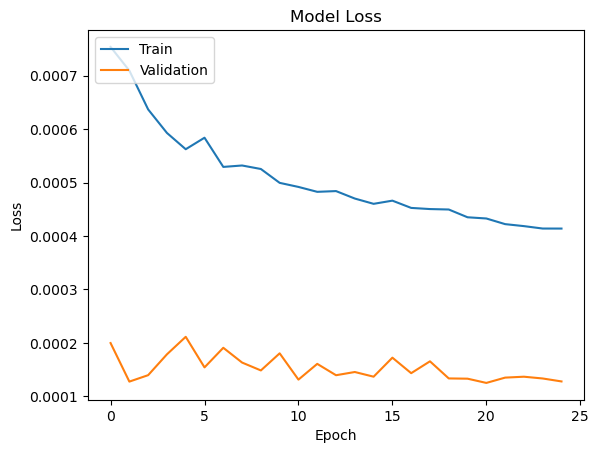

In [93]:
import matplotlib.pyplot as plt

plt.plot(history_e2d2_batch_64.history['loss'])
plt.plot(history_e2d2_batch_64.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [94]:
pred_e2d2_batch_64=model_e2d2_batch_64.predict(X_test)

434/434 [==============================] - 42s 93ms/step


In [95]:
for index,i in enumerate(train_merged.columns):
    scaler = scalers_Acomb['scaler_'+i]
    pred_e2d2_batch_64[:,:,index]=scaler.inverse_transform(pred_e2d2_batch_64[:,:,index])
    y_train[:,:,index]=scaler.inverse_transform(y_train[:,:,index])
    y_test[:,:,index]=scaler.inverse_transform(y_test[:,:,index])
    y_valid[:,:,index]=scaler.inverse_transform(y_valid[:,:,index])

In [96]:
def calculate_nse(y_true, y_pred):
    
    return 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)

for index, i in enumerate(train_merged.columns):
    print(i)
    for j in range(1, 49):
        print("time ", j, ":")
        mae_64 = mean_absolute_error(y_test[:, j - 1, index], pred_e2d2_batch_64[:, j - 1, index])
        mse_64 = mean_squared_error(y_test[:, j - 1, index], pred_e2d2_batch_64[:, j - 1, index])
        nse_64 = calculate_nse(y_test[:, j - 1, index], pred_e2d2_batch_64[:, j - 1, index])
        print("MAE: ", mae_64)
        print("MSE: ", mse_64)
        print("NSE: ", nse_64)
    print()

value_x
time  1 :
MAE:  0.046592137057768705
MSE:  0.017143312733608508
NSE:  0.07030256743883134
time  2 :
MAE:  0.04273230761777061
MSE:  0.015245028821198424
NSE:  0.17324822952081487
time  3 :
MAE:  0.0394933340600288
MSE:  0.01560598947727975
NSE:  0.1536730050336298
time  4 :
MAE:  0.04655796669774598
MSE:  0.016070675843935057
NSE:  0.1284726409768817
time  5 :
MAE:  0.0461597118465374
MSE:  0.016225133860878666
NSE:  0.12009624231797811
time  6 :
MAE:  0.0461486363637155
MSE:  0.016308809493677592
NSE:  0.11555843669138044
time  7 :
MAE:  0.04440298969089596
MSE:  0.016374555270181303
NSE:  0.11199298346964637
time  8 :
MAE:  0.04273964669889131
MSE:  0.01640798752211039
NSE:  0.11017992205810989
time  9 :
MAE:  0.04132569913706521
MSE:  0.016382898149200326
NSE:  0.1115405415568913
time  10 :
MAE:  0.0405041833057195
MSE:  0.01643178213596652
NSE:  0.10888951851973983
time  11 :
MAE:  0.04020169375680439
MSE:  0.01652894974939382
NSE:  0.10362003051965496
time  12 :
MAE:  0.04

In [97]:
X_train, y_train = split(train_Acomb.values,n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))
X_test, y_test = split(test_Acomb.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))
X_valid, y_valid = split(valid_Acomb.values,n_past, n_future)
X_valid = X_valid.reshape((X_valid.shape[0], X_valid.shape[1],n_features))
y_valid = y_valid.reshape((y_valid.shape[0], y_valid.shape[1], n_features))

In [98]:
model_e2d2_batch_128 = tf.keras.models.Model(e_in,d_outs2)
model_e2d2_batch_128.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())
history_e2d2_batch_128=model_e2d2_batch_128.fit(X_train,y_train,epochs=25,validation_data=(X_valid,y_valid),batch_size=128,verbose=1,callbacks=[reduce_learning_rate])

Epoch 1/25
875/875 [==============================] - 564s 632ms/step - loss: 5.1995e-04 - val_loss: 1.9172e-04 - lr: 0.0010
Epoch 2/25
875/875 [==============================] - 479s 547ms/step - loss: 5.4981e-04 - val_loss: 1.7287e-04 - lr: 9.0000e-04
Epoch 3/25
875/875 [==============================] - 476s 544ms/step - loss: 5.1503e-04 - val_loss: 1.4232e-04 - lr: 8.1000e-04
Epoch 4/25
875/875 [==============================] - 474s 541ms/step - loss: 4.9186e-04 - val_loss: 1.4941e-04 - lr: 7.2900e-04
Epoch 5/25
875/875 [==============================] - 476s 544ms/step - loss: 4.8717e-04 - val_loss: 1.6447e-04 - lr: 6.5610e-04
Epoch 6/25
875/875 [==============================] - 472s 540ms/step - loss: 4.6426e-04 - val_loss: 1.5955e-04 - lr: 5.9049e-04
Epoch 7/25
875/875 [==============================] - 474s 542ms/step - loss: 4.4508e-04 - val_loss: 1.7754e-04 - lr: 5.3144e-04
Epoch 8/25
875/875 [==============================] - 476s 544ms/step - loss: 4.7376e-04 - val_loss: 

In [99]:
with open('train_hist_e2d2_128.pkl', 'wb') as file:
    pickle.dump(history_e2d2_batch_128.history, file)

In [100]:
from keras.models import load_model
model_e2d2_batch_128.save('model_e2d2_batch_128.h5')

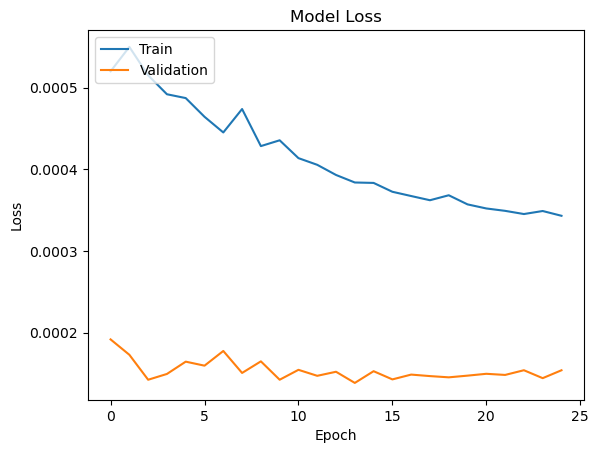

In [101]:
import matplotlib.pyplot as plt

plt.plot(history_e2d2_batch_128.history['loss'])
plt.plot(history_e2d2_batch_128.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [102]:
pred_e2d2_batch_128=model_e2d2_batch_128.predict(X_test)

434/434 [==============================] - 31s 69ms/step


In [103]:
for index,i in enumerate(train_merged.columns):
    scaler = scalers_Acomb['scaler_'+i]
    pred_e2d2_batch_128[:,:,index]=scaler.inverse_transform(pred_e2d2_batch_128[:,:,index])
    y_train[:,:,index]=scaler.inverse_transform(y_train[:,:,index])
    y_test[:,:,index]=scaler.inverse_transform(y_test[:,:,index])
    y_valid[:,:,index]=scaler.inverse_transform(y_valid[:,:,index])

In [104]:
def calculate_nse(y_true, y_pred):
    
    return 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)

for index, i in enumerate(train_merged.columns):
    print(i)
    for j in range(1, 49):
        print("time ", j, ":")
        mae_128 = mean_absolute_error(y_test[:, j - 1, index], pred_e2d2_batch_128[:, j - 1, index])
        mse_128 = mean_squared_error(y_test[:, j - 1, index], pred_e2d2_batch_128[:, j - 1, index])
        nse_128 = calculate_nse(y_test[:, j - 1, index], pred_e2d2_batch_128[:, j - 1, index])
        print("MAE: ", mae_128)
        print("MSE: ", mse_128)
        print("NSE: ", nse_128)
    print()

value_x
time  1 :
MAE:  0.04714897624171955
MSE:  0.018352262965939007
NSE:  0.0047400974216779135
time  2 :
MAE:  0.043160724629662396
MSE:  0.01706947039929452
NSE:  0.0743071043502681
time  3 :
MAE:  0.042142289646452225
MSE:  0.016693553008728892
NSE:  0.09469344614398711
time  4 :
MAE:  0.04232446964482179
MSE:  0.016352545659429073
NSE:  0.11318658466715026
time  5 :
MAE:  0.0427472460466602
MSE:  0.016242703497830448
NSE:  0.11914342493554309
time  6 :
MAE:  0.04378046443949445
MSE:  0.01638538363170159
NSE:  0.11140575158158084
time  7 :
MAE:  0.04354388074796825
MSE:  0.016679075711217854
NSE:  0.0954785631476599
time  8 :
MAE:  0.04294377931795997
MSE:  0.016788063089561923
NSE:  0.08956807855214699
time  9 :
MAE:  0.042241997290768954
MSE:  0.016770715141686838
NSE:  0.09050887353444081
time  10 :
MAE:  0.041958912707734136
MSE:  0.016897001923402086
NSE:  0.08366022656920713
time  11 :
MAE:  0.04190664539363311
MSE:  0.017017522801235585
NSE:  0.07712426981260201
time  12 :

In [105]:
X_train, y_train = split(train_Acomb.values,n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))
X_test, y_test = split(test_Acomb.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))
X_valid, y_valid = split(valid_Acomb.values,n_past, n_future)
X_valid = X_valid.reshape((X_valid.shape[0], X_valid.shape[1],n_features))
y_valid = y_valid.reshape((y_valid.shape[0], y_valid.shape[1], n_features))

In [17]:
reduce_learning_rate = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.90 ** x)

In [18]:
model_e2d2_batch_128_v2 = tf.keras.models.Model(e_in,d_outs2)
model_e2d2_batch_128_v2.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())
history_e2d2_batch_128_v2=model_e2d2_batch_128_v2.fit(X_train,y_train,epochs=150,validation_data=(X_valid,y_valid),batch_size=128,verbose=1,callbacks=[reduce_learning_rate])

Epoch 1/150
875/875 [==============================] - 481s 540ms/step - loss: 0.0028 - val_loss: 3.1149e-04 - lr: 0.0010
Epoch 2/150
875/875 [==============================] - 492s 562ms/step - loss: 0.0010 - val_loss: 5.7133e-04 - lr: 9.0000e-04
Epoch 3/150
875/875 [==============================] - 494s 564ms/step - loss: 9.6843e-04 - val_loss: 1.4664e-04 - lr: 8.1000e-04
Epoch 4/150
875/875 [==============================] - 493s 564ms/step - loss: 9.1937e-04 - val_loss: 2.0297e-04 - lr: 7.2900e-04
Epoch 5/150
875/875 [==============================] - 496s 567ms/step - loss: 8.9458e-04 - val_loss: 2.4986e-04 - lr: 6.5610e-04
Epoch 6/150
875/875 [==============================] - 494s 565ms/step - loss: 8.4421e-04 - val_loss: 1.5600e-04 - lr: 5.9049e-04
Epoch 7/150
875/875 [==============================] - 506s 578ms/step - loss: 8.0835e-04 - val_loss: 2.0631e-04 - lr: 5.3144e-04
Epoch 8/150
875/875 [==============================] - 497s 568ms/step - loss: 7.7987e-04 - val_loss: 

Epoch 64/150
875/875 [==============================] - 489s 559ms/step - loss: 5.7176e-04 - val_loss: 1.1156e-04 - lr: 1.3100e-06
Epoch 65/150
875/875 [==============================] - 489s 558ms/step - loss: 5.7153e-04 - val_loss: 1.1391e-04 - lr: 1.1790e-06
Epoch 66/150
875/875 [==============================] - 489s 559ms/step - loss: 5.7135e-04 - val_loss: 1.1116e-04 - lr: 1.0611e-06
Epoch 67/150
875/875 [==============================] - 485s 554ms/step - loss: 5.7126e-04 - val_loss: 1.1032e-04 - lr: 9.5500e-07
Epoch 68/150
875/875 [==============================] - 491s 561ms/step - loss: 5.7103e-04 - val_loss: 1.1111e-04 - lr: 8.5950e-07
Epoch 69/150
875/875 [==============================] - 488s 558ms/step - loss: 5.7077e-04 - val_loss: 1.1212e-04 - lr: 7.7355e-07
Epoch 70/150
875/875 [==============================] - 485s 555ms/step - loss: 5.7066e-04 - val_loss: 1.1147e-04 - lr: 6.9620e-07
Epoch 71/150
875/875 [==============================] - 487s 557ms/step - loss: 5.7

In [20]:
import pickle
with open('train_hist_e2d2_128_v2.pkl', 'wb') as file:
    pickle.dump(history_e2d2_batch_128_v2.history, file)

In [21]:
from keras.models import load_model
model_e2d2_batch_128_v2.save('model_e2d2_batch_128_v2.h5')

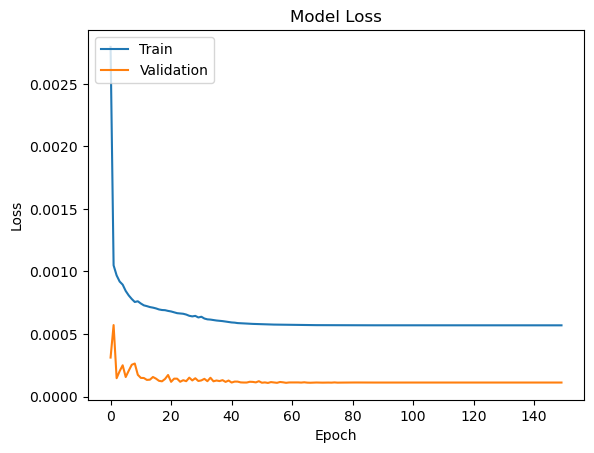

In [23]:
import matplotlib.pyplot as plt

plt.plot(history_e2d2_batch_128_v2.history['loss'])
plt.plot(history_e2d2_batch_128_v2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [24]:
pred_e2d2_batch_128_v2=model_e2d2_batch_128_v2.predict(X_test)

434/434 [==============================] - 30s 64ms/step


In [25]:
for index,i in enumerate(train_merged.columns):
    scaler = scalers_Acomb['scaler_'+i]
    pred_e2d2_batch_128_v2[:,:,index]=scaler.inverse_transform(pred_e2d2_batch_128_v2[:,:,index])
    y_train[:,:,index]=scaler.inverse_transform(y_train[:,:,index])
    y_test[:,:,index]=scaler.inverse_transform(y_test[:,:,index])
    y_valid[:,:,index]=scaler.inverse_transform(y_valid[:,:,index])

In [26]:
def calculate_nse(y_true, y_pred):
    
    return 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)

for index, i in enumerate(train_merged.columns):
    print(i)
    for j in range(1, 49):
        print("time ", j, ":")
        mae_128 = mean_absolute_error(y_test[:, j - 1, index], pred_e2d2_batch_128_v2[:, j - 1, index])
        mse_128 = mean_squared_error(y_test[:, j - 1, index], pred_e2d2_batch_128_v2[:, j - 1, index])
        nse_128 = calculate_nse(y_test[:, j - 1, index], pred_e2d2_batch_128_v2[:, j - 1, index])
        print("MAE: ", mae_128)
        print("MSE: ", mse_128)
        print("NSE: ", nse_128)
    print()

value_x
time  1 :
MAE:  0.07021770873895797
MSE:  0.02566573502669132
NSE:  -0.39187614027079487
time  2 :
MAE:  0.04494886159764133
MSE:  0.015632808680377353
NSE:  0.15221857527138805
time  3 :
MAE:  0.03686967351613347
MSE:  0.015113785782277204
NSE:  0.18036565881949262
time  4 :
MAE:  0.03846912515190583
MSE:  0.0162188778933369
NSE:  0.12043550912435008
time  5 :
MAE:  0.038685407440119855
MSE:  0.016637560280371107
NSE:  0.09772998269939104
time  6 :
MAE:  0.03893636255368466
MSE:  0.016712759824195515
NSE:  0.09365184308252117
time  7 :
MAE:  0.03930781513947735
MSE:  0.016713697339843278
NSE:  0.09360100075675493
time  8 :
MAE:  0.0395147137354231
MSE:  0.0166940556723754
NSE:  0.0946661862375231
time  9 :
MAE:  0.03967569563790041
MSE:  0.016670889348543598
NSE:  0.09592251703676746
time  10 :
MAE:  0.039899722458533085
MSE:  0.016745233956471206
NSE:  0.09189074137070452
time  11 :
MAE:  0.040158442188778815
MSE:  0.016863596218229922
NSE:  0.0854718483259852
time  12 :
MAE:

In [27]:
n_past = 48
n_future = 48 
n_features = 2
X_train, y_train = split(train_Acomb.values,n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))
X_test, y_test = split(test_Acomb.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))
X_valid, y_valid = split(valid_Acomb.values,n_past, n_future)
X_valid = X_valid.reshape((X_valid.shape[0], X_valid.shape[1],n_features))
y_valid = y_valid.reshape((y_valid.shape[0], y_valid.shape[1], n_features))

In [29]:
e_in = tf.keras.layers.Input(shape=(n_past, n_features))
e_l1 = tf.keras.layers.LSTM(100,return_sequences = True, return_state=True)
e_outs1 = e_l1(e_in)
e_states1 = e_outs1[1:]
e_l2 = tf.keras.layers.LSTM(100, return_state=True)
e_outs2 = e_l2(e_outs1[0])
e_states2 = e_outs2[1:]

d_in = tf.keras.layers.RepeatVector(n_future)(e_outs2[0])

d_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(d_in,initial_state = e_states1)
d_l2 = tf.keras.layers.LSTM(100, return_sequences=True)(d_l1,initial_state = e_states2)
d_outs2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(d_l2)

model_e2d2 = tf.keras.models.Model(e_in,d_outs2)

model_e2d2.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 48, 2)]      0           []                               
                                                                                                  
 lstm_4 (LSTM)                  [(None, 48, 100),    41200       ['input_2[0][0]']                
                                 (None, 100),                                                     
                                 (None, 100)]                                                     
                                                                                                  
 lstm_5 (LSTM)                  [(None, 100),        80400       ['lstm_4[0][0]']                 
                                 (None, 100),                                               

In [30]:
model_e2d2_batch_32_48in = tf.keras.models.Model(e_in,d_outs2)
model_e2d2_batch_32_48in.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())
history_e2d2_batch_32_48in=model_e2d2_batch_32_48in.fit(X_train,y_train,epochs=25,validation_data=(X_valid,y_valid),batch_size=32,verbose=1,callbacks=[reduce_learning_rate])

Epoch 1/25
3501/3501 [==============================] - 441s 124ms/step - loss: 0.0015 - val_loss: 5.8027e-04 - lr: 0.0010
Epoch 2/25
3501/3501 [==============================] - 439s 125ms/step - loss: 9.2356e-04 - val_loss: 2.3633e-04 - lr: 9.0000e-04
Epoch 3/25
3501/3501 [==============================] - 441s 126ms/step - loss: 8.5217e-04 - val_loss: 1.5450e-04 - lr: 8.1000e-04
Epoch 4/25
3501/3501 [==============================] - 443s 126ms/step - loss: 8.0445e-04 - val_loss: 1.9226e-04 - lr: 7.2900e-04
Epoch 5/25
3501/3501 [==============================] - 441s 126ms/step - loss: 7.7858e-04 - val_loss: 1.4579e-04 - lr: 6.5610e-04
Epoch 6/25
3501/3501 [==============================] - 440s 126ms/step - loss: 7.5782e-04 - val_loss: 1.3108e-04 - lr: 5.9049e-04
Epoch 7/25
3501/3501 [==============================] - 445s 127ms/step - loss: 7.3869e-04 - val_loss: 5.3408e-04 - lr: 5.3144e-04
Epoch 8/25
3501/3501 [==============================] - 447s 128ms/step - loss: 7.2807e-04 

In [38]:
with open('history_e2d2_batch_32_48in.pkl', 'wb') as file:
    pickle.dump(history_e2d2_batch_32_48in.history, file)

In [39]:
from keras.models import load_model
model_e2d2_batch_32_48in.save('model_e2d2_batch_32_48in.h5')

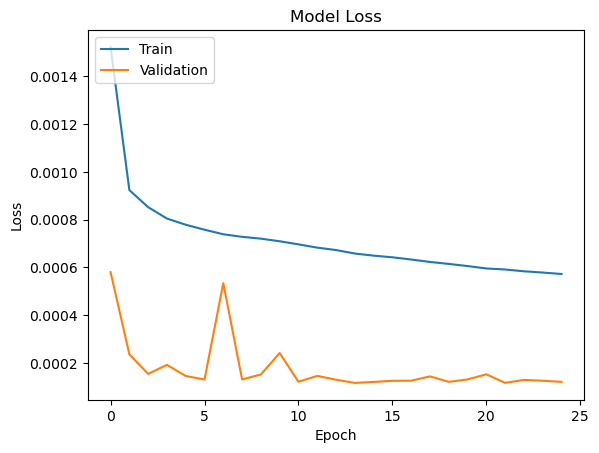

In [31]:
import matplotlib.pyplot as plt

plt.plot(history_e2d2_batch_32_48in.history['loss'])
plt.plot(history_e2d2_batch_32_48in.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [34]:
pred_e2d2_batch_32_48in=model_e2d2_batch_32_48in.predict(X_test)

436/436 [==============================] - 22s 46ms/step


In [36]:
for index,i in enumerate(train_merged.columns):
    scaler = scalers_Acomb['scaler_'+i]
    pred_e2d2_batch_32_48in[:,:,index]=scaler.inverse_transform(pred_e2d2_batch_32_48in[:,:,index])
    y_train[:,:,index]=scaler.inverse_transform(y_train[:,:,index])
    y_test[:,:,index]=scaler.inverse_transform(y_test[:,:,index])
    y_valid[:,:,index]=scaler.inverse_transform(y_valid[:,:,index])

In [37]:
def calculate_nse(y_true, y_pred):
    
    return 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)

for index, i in enumerate(train_merged.columns):
    print(i)
    for j in range(1, 49):
        print("time ", j, ":")
        mae_32_48in = mean_absolute_error(y_test[:, j - 1, index], pred_e2d2_batch_32_48in[:, j - 1, index])
        mse_32_48in = mean_squared_error(y_test[:, j - 1, index], pred_e2d2_batch_32_48in[:, j - 1, index])
        nse_32_48in = calculate_nse(y_test[:, j - 1, index], pred_e2d2_batch_32_48in[:, j - 1, index])
        print("MAE: ", mae_32_48in)
        print("MSE: ", mse_32_48in)
        print("NSE: ", nse_32_48in)
    print()

value_x
time  1 :
MAE:  0.05331066703902958
MSE:  0.017443974574709857
NSE:  0.05084280562237431
time  2 :
MAE:  0.04592685094629448
MSE:  0.016703109826562392
NSE:  0.0911545535415913
time  3 :
MAE:  0.041532147637601935
MSE:  0.016339809033529978
NSE:  0.11092238569205459
time  4 :
MAE:  0.0399826018116827
MSE:  0.016627029036023127
NSE:  0.0952942425433726
time  5 :
MAE:  0.04188548721145264
MSE:  0.016419089484636287
NSE:  0.10660859755743124
time  6 :
MAE:  0.038486609291987085
MSE:  0.01652329496025973
NSE:  0.10093859520458837
time  7 :
MAE:  0.038353571428299635
MSE:  0.0168858692045241
NSE:  0.08121029584450512
time  8 :
MAE:  0.038196926608931904
MSE:  0.01721666534909487
NSE:  0.06321109852012174
time  9 :
MAE:  0.03827481616036472
MSE:  0.017383206279998918
NSE:  0.0541493149197777
time  10 :
MAE:  0.03846758146455091
MSE:  0.017516478265189456
NSE:  0.04689775289698139
time  11 :
MAE:  0.03896403070158169
MSE:  0.017586069782876322
NSE:  0.0431111565913489
time  12 :
MAE: 

MAE:  0.009736777535538404
MSE:  0.0005777135745339844
NSE:  0.8069601442641435
time  45 :
MAE:  0.009885714615482292
MSE:  0.0005907949190838821
NSE:  0.8025688669929798
time  46 :
MAE:  0.010030609110886185
MSE:  0.0006037546708907962
NSE:  0.7982168010996463
time  47 :
MAE:  0.010170813647577779
MSE:  0.0006160039046594591
NSE:  0.7941011091437133
time  48 :
MAE:  0.010313531145233666
MSE:  0.0006283801856433997
NSE:  0.7899412141371501



In [40]:
n_past = 48
n_future = 48 
n_features = 2
X_train, y_train = split(train_Acomb.values,n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))
X_test, y_test = split(test_Acomb.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))
X_valid, y_valid = split(valid_Acomb.values,n_past, n_future)
X_valid = X_valid.reshape((X_valid.shape[0], X_valid.shape[1],n_features))
y_valid = y_valid.reshape((y_valid.shape[0], y_valid.shape[1], n_features))

In [41]:
e_in = tf.keras.layers.Input(shape=(n_past, n_features))
e_l1 = tf.keras.layers.LSTM(100,return_sequences = True, return_state=True)
e_outs1 = e_l1(e_in)
e_states1 = e_outs1[1:]
e_l2 = tf.keras.layers.LSTM(100, return_state=True)
e_outs2 = e_l2(e_outs1[0])
e_states2 = e_outs2[1:]

d_in = tf.keras.layers.RepeatVector(n_future)(e_outs2[0])

d_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(d_in,initial_state = e_states1)
d_l2 = tf.keras.layers.LSTM(100, return_sequences=True)(d_l1,initial_state = e_states2)
d_outs2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(d_l2)

model_e2d2_batch_64_48in = tf.keras.models.Model(e_in,d_outs2)

In [42]:
model_e2d2_batch_64_48in.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())
history_e2d2_batch_64_48in=model_e2d2_batch_64_48in.fit(X_train,y_train,epochs=25,validation_data=(X_valid,y_valid),batch_size=64,verbose=1,callbacks=[reduce_learning_rate])

Epoch 1/25
1751/1751 [==============================] - 497s 278ms/step - loss: 0.0020 - val_loss: 1.5389e-04 - lr: 0.0010
Epoch 2/25
1751/1751 [==============================] - 438s 250ms/step - loss: 9.9388e-04 - val_loss: 2.4848e-04 - lr: 9.0000e-04
Epoch 3/25
1751/1751 [==============================] - 426s 243ms/step - loss: 9.0060e-04 - val_loss: 3.3754e-04 - lr: 8.1000e-04
Epoch 4/25
1751/1751 [==============================] - 423s 241ms/step - loss: 8.4702e-04 - val_loss: 1.8131e-04 - lr: 7.2900e-04
Epoch 5/25
1751/1751 [==============================] - 424s 242ms/step - loss: 8.0163e-04 - val_loss: 1.9104e-04 - lr: 6.5610e-04
Epoch 6/25
1751/1751 [==============================] - 423s 242ms/step - loss: 7.7872e-04 - val_loss: 1.5441e-04 - lr: 5.9049e-04
Epoch 7/25
1751/1751 [==============================] - 423s 242ms/step - loss: 7.6517e-04 - val_loss: 1.2811e-04 - lr: 5.3144e-04
Epoch 8/25
1751/1751 [==============================] - 425s 243ms/step - loss: 7.4746e-04 

In [43]:
with open('history_e2d2_batch_64_48in.pkl', 'wb') as file:
    pickle.dump(history_e2d2_batch_64_48in.history, file)

In [44]:
from keras.models import load_model
model_e2d2_batch_64_48in.save('model_e2d2_batch_64_48in.h5')

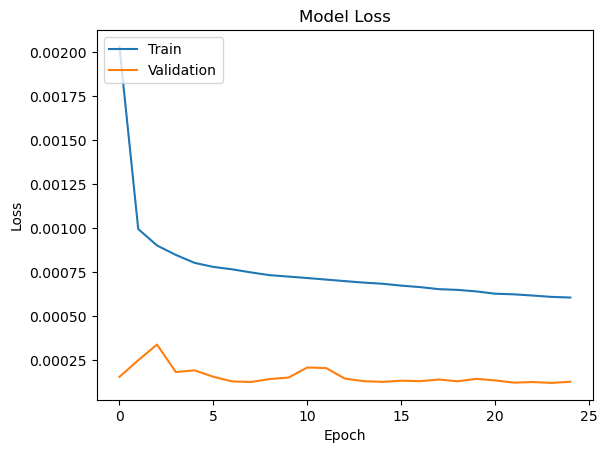

In [45]:
import matplotlib.pyplot as plt

plt.plot(history_e2d2_batch_64_48in.history['loss'])
plt.plot(history_e2d2_batch_64_48in.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [46]:
pred_e2d2_batch_64_48in=model_e2d2_batch_64_48in.predict(X_test)

436/436 [==============================] - 27s 58ms/step


In [47]:
for index,i in enumerate(train_merged.columns):
    scaler = scalers_Acomb['scaler_'+i]
    pred_e2d2_batch_64_48in[:,:,index]=scaler.inverse_transform(pred_e2d2_batch_64_48in[:,:,index])
    y_train[:,:,index]=scaler.inverse_transform(y_train[:,:,index])
    y_test[:,:,index]=scaler.inverse_transform(y_test[:,:,index])
    y_valid[:,:,index]=scaler.inverse_transform(y_valid[:,:,index])

In [48]:
def calculate_nse(y_true, y_pred):
    
    return 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)

for index, i in enumerate(train_merged.columns):
    print(i)
    for j in range(1, 49):
        print("time ", j, ":")
        mae_64_48in = mean_absolute_error(y_test[:, j - 1, index], pred_e2d2_batch_64_48in[:, j - 1, index])
        mse_64_48in = mean_squared_error(y_test[:, j - 1, index], pred_e2d2_batch_64_48in[:, j - 1, index])
        nse_64_48in = calculate_nse(y_test[:, j - 1, index], pred_e2d2_batch_64_48in[:, j - 1, index])
        print("MAE: ", mae_64_48in)
        print("MSE: ", mse_64_48in)
        print("NSE: ", nse_64_48in)
    print()

value_x
time  1 :
MAE:  0.053116568722151036
MSE:  0.012945651964533553
NSE:  0.2956044136947935
time  2 :
MAE:  0.057747882409984845
MSE:  0.014699854019683252
NSE:  0.20015520893320915
time  3 :
MAE:  0.05560581856597934
MSE:  0.015438458798632248
NSE:  0.15996642989442766
time  4 :
MAE:  0.05483694099020371
MSE:  0.01566277445870572
NSE:  0.14776102213838926
time  5 :
MAE:  0.05041537798273404
MSE:  0.015753332426125942
NSE:  0.14283360459848227
time  6 :
MAE:  0.049706266605388724
MSE:  0.015971327177198645
NSE:  0.13097212856668394
time  7 :
MAE:  0.05141324654492277
MSE:  0.016225735542827024
NSE:  0.11712932402051612
time  8 :
MAE:  0.05364137676361856
MSE:  0.0164674148457686
NSE:  0.1039791300588867
time  9 :
MAE:  0.055270685566489224
MSE:  0.01668003375788792
NSE:  0.09241016283559256
time  10 :
MAE:  0.05633952670797152
MSE:  0.016936010863683494
NSE:  0.07848200039066
time  11 :
MAE:  0.05708574586996518
MSE:  0.017193839270384374
NSE:  0.0644531054225459
time  12 :
MAE:  

In [49]:
n_past = 48
n_future = 48 
n_features = 2
X_train, y_train = split(train_Acomb.values,n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))
X_test, y_test = split(test_Acomb.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))
X_valid, y_valid = split(valid_Acomb.values,n_past, n_future)
X_valid = X_valid.reshape((X_valid.shape[0], X_valid.shape[1],n_features))
y_valid = y_valid.reshape((y_valid.shape[0], y_valid.shape[1], n_features))

In [50]:
e_in = tf.keras.layers.Input(shape=(n_past, n_features))
e_l1 = tf.keras.layers.LSTM(100,return_sequences = True, return_state=True)
e_outs1 = e_l1(e_in)
e_states1 = e_outs1[1:]
e_l2 = tf.keras.layers.LSTM(100, return_state=True)
e_outs2 = e_l2(e_outs1[0])
e_states2 = e_outs2[1:]

d_in = tf.keras.layers.RepeatVector(n_future)(e_outs2[0])

d_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(d_in,initial_state = e_states1)
d_l2 = tf.keras.layers.LSTM(100, return_sequences=True)(d_l1,initial_state = e_states2)
d_outs2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(d_l2)

model_e2d2_batch_128_48in = tf.keras.models.Model(e_in,d_outs2)

In [51]:
model_e2d2_batch_128_48in.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())
history_e2d2_batch_128_48in=model_e2d2_batch_128_48in.fit(X_train,y_train,epochs=25,validation_data=(X_valid,y_valid),batch_size=128,verbose=1,callbacks=[reduce_learning_rate])

Epoch 1/25
876/876 [==============================] - 413s 461ms/step - loss: 0.0024 - val_loss: 2.4295e-04 - lr: 0.0010
Epoch 2/25
876/876 [==============================] - 395s 451ms/step - loss: 0.0010 - val_loss: 1.8162e-04 - lr: 9.0000e-04
Epoch 3/25
876/876 [==============================] - 400s 456ms/step - loss: 9.5577e-04 - val_loss: 1.6312e-04 - lr: 8.1000e-04
Epoch 4/25
876/876 [==============================] - 397s 454ms/step - loss: 9.0477e-04 - val_loss: 1.4517e-04 - lr: 7.2900e-04
Epoch 5/25
876/876 [==============================] - 397s 453ms/step - loss: 8.5395e-04 - val_loss: 1.4478e-04 - lr: 6.5610e-04
Epoch 6/25
876/876 [==============================] - 396s 453ms/step - loss: 8.2177e-04 - val_loss: 1.4189e-04 - lr: 5.9049e-04
Epoch 7/25
876/876 [==============================] - 397s 453ms/step - loss: 7.9042e-04 - val_loss: 2.2659e-04 - lr: 5.3144e-04
Epoch 8/25
876/876 [==============================] - 397s 454ms/step - loss: 7.7712e-04 - val_loss: 1.9490e-

In [52]:
with open('history_e2d2_batch_128_48in.pkl', 'wb') as file:
    pickle.dump(history_e2d2_batch_128_48in.history, file)

In [53]:
from keras.models import load_model
model_e2d2_batch_128_48in.save('model_e2d2_batch_128_48in.h5')

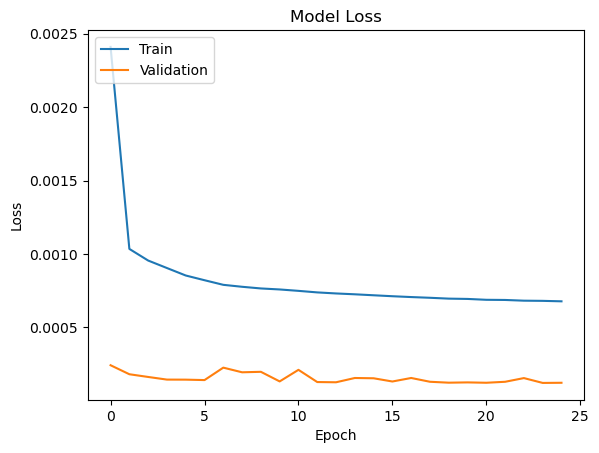

In [54]:
import matplotlib.pyplot as plt

plt.plot(history_e2d2_batch_128_48in.history['loss'])
plt.plot(history_e2d2_batch_128_48in.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [55]:
pred_e2d2_batch_128_48in=model_e2d2_batch_128_48in.predict(X_test)

436/436 [==============================] - 28s 60ms/step


In [56]:
for index,i in enumerate(train_merged.columns):
    scaler = scalers_Acomb['scaler_'+i]
    pred_e2d2_batch_128_48in[:,:,index]=scaler.inverse_transform(pred_e2d2_batch_128_48in[:,:,index])
    y_train[:,:,index]=scaler.inverse_transform(y_train[:,:,index])
    y_test[:,:,index]=scaler.inverse_transform(y_test[:,:,index])
    y_valid[:,:,index]=scaler.inverse_transform(y_valid[:,:,index])

In [57]:
def calculate_nse(y_true, y_pred):
    
    return 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)

for index, i in enumerate(train_merged.columns):
    print(i)
    for j in range(1, 49):
        print("time ", j, ":")
        mae_128_48in = mean_absolute_error(y_test[:, j - 1, index], pred_e2d2_batch_128_48in[:, j - 1, index])
        mse_128_48in = mean_squared_error(y_test[:, j - 1, index], pred_e2d2_batch_128_48in[:, j - 1, index])
        nse_128_48in = calculate_nse(y_test[:, j - 1, index], pred_e2d2_batch_128_48in[:, j - 1, index])
        print("MAE: ", mae_128_48in)
        print("MSE: ", mse_128_48in)
        print("NSE: ", nse_128_48in)
    print()

value_x
time  1 :
MAE:  0.03807973275200808
MSE:  0.013001514560865533
NSE:  0.292564832034202
time  2 :
MAE:  0.03352623620072123
MSE:  0.013920933416161768
NSE:  0.24253764256466126
time  3 :
MAE:  0.035552315591441716
MSE:  0.014719992074709516
NSE:  0.19905946210515169
time  4 :
MAE:  0.03689592345127621
MSE:  0.015336673111122108
NSE:  0.1655047673398965
time  5 :
MAE:  0.03677525354542066
MSE:  0.015722455603167554
NSE:  0.14451366658922637
time  6 :
MAE:  0.035960470839673936
MSE:  0.01617449501698527
NSE:  0.11991741073424622
time  7 :
MAE:  0.03537017556429059
MSE:  0.01665360061359261
NSE:  0.09384843649108687
time  8 :
MAE:  0.035717249336300216
MSE:  0.01703114144760928
NSE:  0.07330577878177202
time  9 :
MAE:  0.036634237884326015
MSE:  0.017298669482724217
NSE:  0.058749110051287246
time  10 :
MAE:  0.037397516287806465
MSE:  0.017535580490741557
NSE:  0.045858367363956876
time  11 :
MAE:  0.037721957981153444
MSE:  0.01772533548140444
NSE:  0.03553346613314168
time  12 :

In [58]:
n_past = 24
n_future = 48 
n_features = 2
X_train, y_train = split(train_Acomb.values,n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))
X_test, y_test = split(test_Acomb.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))
X_valid, y_valid = split(valid_Acomb.values,n_past, n_future)
X_valid = X_valid.reshape((X_valid.shape[0], X_valid.shape[1],n_features))
y_valid = y_valid.reshape((y_valid.shape[0], y_valid.shape[1], n_features))

In [59]:
e_in = tf.keras.layers.Input(shape=(n_past, n_features))
e_l1 = tf.keras.layers.LSTM(100,return_sequences = True, return_state=True)
e_outs1 = e_l1(e_in)
e_states1 = e_outs1[1:]
e_l2 = tf.keras.layers.LSTM(100, return_state=True)
e_outs2 = e_l2(e_outs1[0])
e_states2 = e_outs2[1:]

d_in = tf.keras.layers.RepeatVector(n_future)(e_outs2[0])

d_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(d_in,initial_state = e_states1)
d_l2 = tf.keras.layers.LSTM(100, return_sequences=True)(d_l1,initial_state = e_states2)
d_outs2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(d_l2)

model_e2d2_batch_32_24in = tf.keras.models.Model(e_in,d_outs2)

In [60]:
model_e2d2_batch_32_24in.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())
history_e2d2_batch_32_24in=model_e2d2_batch_32_24in.fit(X_train,y_train,epochs=25,validation_data=(X_valid,y_valid),batch_size=32,verbose=1,callbacks=[reduce_learning_rate])

Epoch 1/25
3502/3502 [==============================] - 466s 131ms/step - loss: 0.0015 - val_loss: 1.4378e-04 - lr: 0.0010
Epoch 2/25
3502/3502 [==============================] - 446s 127ms/step - loss: 9.4789e-04 - val_loss: 1.6237e-04 - lr: 9.0000e-04
Epoch 3/25
3502/3502 [==============================] - 450s 129ms/step - loss: 8.7298e-04 - val_loss: 1.7473e-04 - lr: 8.1000e-04
Epoch 4/25
3502/3502 [==============================] - 449s 128ms/step - loss: 8.1803e-04 - val_loss: 1.4317e-04 - lr: 7.2900e-04
Epoch 5/25
3502/3502 [==============================] - 447s 128ms/step - loss: 7.9301e-04 - val_loss: 1.3370e-04 - lr: 6.5610e-04
Epoch 6/25
3502/3502 [==============================] - 447s 128ms/step - loss: 7.7217e-04 - val_loss: 1.9612e-04 - lr: 5.9049e-04
Epoch 7/25
3502/3502 [==============================] - 447s 128ms/step - loss: 7.5959e-04 - val_loss: 2.1313e-04 - lr: 5.3144e-04
Epoch 8/25
3502/3502 [==============================] - 447s 128ms/step - loss: 7.4793e-04 

In [61]:
with open('history_e2d2_batch_32_24in.pkl', 'wb') as file:
    pickle.dump(history_e2d2_batch_32_24in.history, file)

In [62]:
from keras.models import load_model
model_e2d2_batch_32_24in.save('model_e2d2_batch_32_24in.h5')

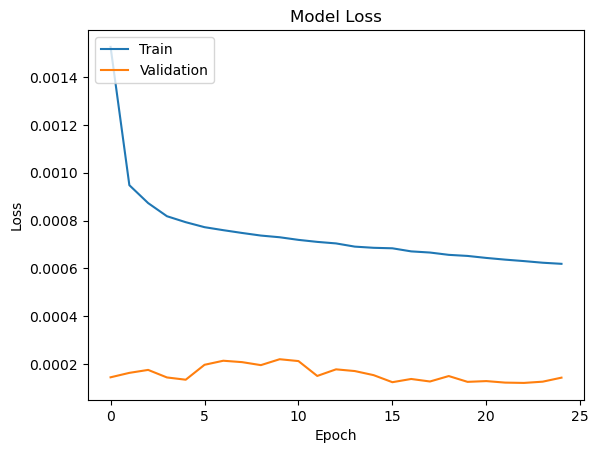

In [63]:
import matplotlib.pyplot as plt

plt.plot(history_e2d2_batch_32_24in.history['loss'])
plt.plot(history_e2d2_batch_32_24in.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [64]:
pred_e2d2_batch_32_24in=model_e2d2_batch_32_24in.predict(X_test)

436/436 [==============================] - 21s 44ms/step


In [65]:
for index,i in enumerate(train_merged.columns):
    scaler = scalers_Acomb['scaler_'+i]
    pred_e2d2_batch_32_24in[:,:,index]=scaler.inverse_transform(pred_e2d2_batch_32_24in[:,:,index])
    y_train[:,:,index]=scaler.inverse_transform(y_train[:,:,index])
    y_test[:,:,index]=scaler.inverse_transform(y_test[:,:,index])
    y_valid[:,:,index]=scaler.inverse_transform(y_valid[:,:,index])

In [66]:
def calculate_nse(y_true, y_pred):
    
    return 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)

for index, i in enumerate(train_merged.columns):
    print(i)
    for j in range(1, 49):
        print("time ", j, ":")
        mae_32_24in = mean_absolute_error(y_test[:, j - 1, index], pred_e2d2_batch_32_24in[:, j - 1, index])
        mse_32_24in = mean_squared_error(y_test[:, j - 1, index], pred_e2d2_batch_32_24in[:, j - 1, index])
        nse_32_24in = calculate_nse(y_test[:, j - 1, index], pred_e2d2_batch_32_24in[:, j - 1, index])
        print("MAE: ", mae_32_24in)
        print("MSE: ", mse_32_24in)
        print("NSE: ", nse_32_24in)
    print()

value_x
time  1 :
MAE:  0.04506679624130002
MSE:  0.015973929174386
NSE:  0.129386163541252
time  2 :
MAE:  0.0362977426427004
MSE:  0.014648387064892058
NSE:  0.20163108767579896
time  3 :
MAE:  0.03751933705396372
MSE:  0.01482311254957398
NSE:  0.19210816924506235
time  4 :
MAE:  0.03854966294889243
MSE:  0.015233847911697518
NSE:  0.16972219986433912
time  5 :
MAE:  0.038341832056138316
MSE:  0.015460327902704433
NSE:  0.15737854842460175
time  6 :
MAE:  0.03915904347619805
MSE:  0.015833360483743317
NSE:  0.13704746250598288
time  7 :
MAE:  0.0402183283757132
MSE:  0.01620666284138213
NSE:  0.11670167317669511
time  8 :
MAE:  0.04133537515075747
MSE:  0.016434053751416013
NSE:  0.10430837467141019
time  9 :
MAE:  0.04227396992137859
MSE:  0.01646467833045152
NSE:  0.10263926859531791
time  10 :
MAE:  0.04303526060610261
MSE:  0.016573081753336286
NSE:  0.09673104658853071
time  11 :
MAE:  0.043616104634231566
MSE:  0.016635439978684215
NSE:  0.09333238786078502
time  12 :
MAE:  0.

In [67]:
n_past = 24
n_future = 48 
n_features = 2
X_train, y_train = split(train_Acomb.values,n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))
X_test, y_test = split(test_Acomb.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))
X_valid, y_valid = split(valid_Acomb.values,n_past, n_future)
X_valid = X_valid.reshape((X_valid.shape[0], X_valid.shape[1],n_features))
y_valid = y_valid.reshape((y_valid.shape[0], y_valid.shape[1], n_features))

In [68]:
e_in = tf.keras.layers.Input(shape=(n_past, n_features))
e_l1 = tf.keras.layers.LSTM(100,return_sequences = True, return_state=True)
e_outs1 = e_l1(e_in)
e_states1 = e_outs1[1:]
e_l2 = tf.keras.layers.LSTM(100, return_state=True)
e_outs2 = e_l2(e_outs1[0])
e_states2 = e_outs2[1:]

d_in = tf.keras.layers.RepeatVector(n_future)(e_outs2[0])

d_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(d_in,initial_state = e_states1)
d_l2 = tf.keras.layers.LSTM(100, return_sequences=True)(d_l1,initial_state = e_states2)
d_outs2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(d_l2)

model_e2d2_batch_64_24in = tf.keras.models.Model(e_in,d_outs2)

In [69]:
model_e2d2_batch_64_24in.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())
history_e2d2_batch_64_24in=model_e2d2_batch_64_24in.fit(X_train,y_train,epochs=25,validation_data=(X_valid,y_valid),batch_size=64,verbose=1,callbacks=[reduce_learning_rate])

Epoch 1/25
1751/1751 [==============================] - 369s 206ms/step - loss: 0.0019 - val_loss: 1.4747e-04 - lr: 0.0010
Epoch 2/25
1751/1751 [==============================] - 337s 193ms/step - loss: 9.9055e-04 - val_loss: 1.9437e-04 - lr: 9.0000e-04
Epoch 3/25
1751/1751 [==============================] - 338s 193ms/step - loss: 9.1032e-04 - val_loss: 2.4443e-04 - lr: 8.1000e-04
Epoch 4/25
1751/1751 [==============================] - 338s 193ms/step - loss: 8.6888e-04 - val_loss: 1.5746e-04 - lr: 7.2900e-04
Epoch 5/25
1751/1751 [==============================] - 338s 193ms/step - loss: 8.3771e-04 - val_loss: 1.4430e-04 - lr: 6.5610e-04
Epoch 6/25
1751/1751 [==============================] - 344s 197ms/step - loss: 8.0421e-04 - val_loss: 2.4188e-04 - lr: 5.9049e-04
Epoch 7/25
1751/1751 [==============================] - 347s 198ms/step - loss: 7.9054e-04 - val_loss: 2.7331e-04 - lr: 5.3144e-04
Epoch 8/25
1751/1751 [==============================] - 349s 199ms/step - loss: 7.6838e-04 

In [70]:
with open('history_e2d2_batch_64_24in.pkl', 'wb') as file:
    pickle.dump(history_e2d2_batch_64_24in.history, file)

In [71]:
from keras.models import load_model
model_e2d2_batch_64_24in.save('model_e2d2_batch_64_24in.h5')

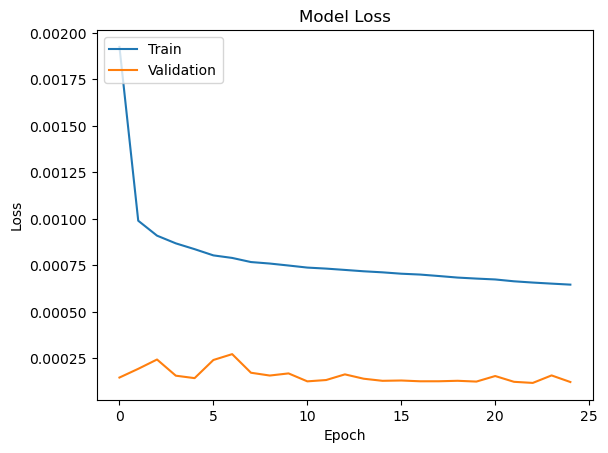

In [72]:
import matplotlib.pyplot as plt

plt.plot(history_e2d2_batch_64_24in.history['loss'])
plt.plot(history_e2d2_batch_64_24in.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [73]:
pred_e2d2_batch_64_24in=model_e2d2_batch_64_24in.predict(X_test)

436/436 [==============================] - 22s 45ms/step


In [74]:
for index,i in enumerate(train_merged.columns):
    scaler = scalers_Acomb['scaler_'+i]
    pred_e2d2_batch_64_24in[:,:,index]=scaler.inverse_transform(pred_e2d2_batch_64_24in[:,:,index])
    y_train[:,:,index]=scaler.inverse_transform(y_train[:,:,index])
    y_test[:,:,index]=scaler.inverse_transform(y_test[:,:,index])
    y_valid[:,:,index]=scaler.inverse_transform(y_valid[:,:,index])

In [75]:
def calculate_nse(y_true, y_pred):
    
    return 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)

for index, i in enumerate(train_merged.columns):
    print(i)
    for j in range(1, 49):
        print("time ", j, ":")
        mae_64_24in = mean_absolute_error(y_test[:, j - 1, index], pred_e2d2_batch_64_24in[:, j - 1, index])
        mse_64_24in = mean_squared_error(y_test[:, j - 1, index], pred_e2d2_batch_64_24in[:, j - 1, index])
        nse_64_24in = calculate_nse(y_test[:, j - 1, index], pred_e2d2_batch_64_24in[:, j - 1, index])
        print("MAE: ", mae_64_24in)
        print("MSE: ", mse_64_24in)
        print("NSE: ", nse_64_24in)
    print()

value_x
time  1 :
MAE:  0.049008657249535785
MSE:  0.012665519283531629
NSE:  0.30970168868289305
time  2 :
MAE:  0.04237139766043886
MSE:  0.013988122529384037
NSE:  0.2376169390002203
time  3 :
MAE:  0.03974656169840703
MSE:  0.014662570041246284
NSE:  0.20085808465810961
time  4 :
MAE:  0.03906361063867741
MSE:  0.015241942865194185
NSE:  0.16928100731598417
time  5 :
MAE:  0.0377153075966636
MSE:  0.015576590744509717
NSE:  0.1510419710154568
time  6 :
MAE:  0.03700082427125015
MSE:  0.015892456749068157
NSE:  0.13382658768469335
time  7 :
MAE:  0.0370717211416169
MSE:  0.01619387543303153
NSE:  0.11739861470691881
time  8 :
MAE:  0.037520629383735446
MSE:  0.01638957540477621
NSE:  0.10673254117325714
time  9 :
MAE:  0.037970850891948384
MSE:  0.016482127253558312
NSE:  0.1016882643857564
time  10 :
MAE:  0.03832499144097632
MSE:  0.016626054260581113
NSE:  0.09384392988381851
time  11 :
MAE:  0.03855495399046093
MSE:  0.01679207597899935
NSE:  0.08479538561962185
time  12 :
MAE: 

In [76]:
n_past = 24
n_future = 48 
n_features = 2
X_train, y_train = split(train_Acomb.values,n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))
X_test, y_test = split(test_Acomb.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))
X_valid, y_valid = split(valid_Acomb.values,n_past, n_future)
X_valid = X_valid.reshape((X_valid.shape[0], X_valid.shape[1],n_features))
y_valid = y_valid.reshape((y_valid.shape[0], y_valid.shape[1], n_features))

In [77]:
e_in = tf.keras.layers.Input(shape=(n_past, n_features))
e_l1 = tf.keras.layers.LSTM(100,return_sequences = True, return_state=True)
e_outs1 = e_l1(e_in)
e_states1 = e_outs1[1:]
e_l2 = tf.keras.layers.LSTM(100, return_state=True)
e_outs2 = e_l2(e_outs1[0])
e_states2 = e_outs2[1:]

d_in = tf.keras.layers.RepeatVector(n_future)(e_outs2[0])

d_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(d_in,initial_state = e_states1)
d_l2 = tf.keras.layers.LSTM(100, return_sequences=True)(d_l1,initial_state = e_states2)
d_outs2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(d_l2)

model_e2d2_batch_128_24in = tf.keras.models.Model(e_in,d_outs2)

In [78]:
model_e2d2_batch_128_24in.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())
history_e2d2_batch_128_24in=model_e2d2_batch_64_24in.fit(X_train,y_train,epochs=25,validation_data=(X_valid,y_valid),batch_size=128,verbose=1,callbacks=[reduce_learning_rate])

Epoch 1/25
876/876 [==============================] - 314s 359ms/step - loss: 7.3617e-04 - val_loss: 2.0119e-04 - lr: 0.0010
Epoch 2/25
876/876 [==============================] - 331s 377ms/step - loss: 7.2600e-04 - val_loss: 1.5809e-04 - lr: 9.0000e-04
Epoch 3/25
876/876 [==============================] - 328s 374ms/step - loss: 7.1635e-04 - val_loss: 1.4648e-04 - lr: 8.1000e-04
Epoch 4/25
876/876 [==============================] - 319s 364ms/step - loss: 7.0449e-04 - val_loss: 1.2282e-04 - lr: 7.2900e-04
Epoch 5/25
876/876 [==============================] - 319s 364ms/step - loss: 7.0275e-04 - val_loss: 1.7019e-04 - lr: 6.5610e-04
Epoch 6/25
876/876 [==============================] - 316s 361ms/step - loss: 6.8206e-04 - val_loss: 3.1626e-04 - lr: 5.9049e-04
Epoch 7/25
876/876 [==============================] - 319s 364ms/step - loss: 6.7697e-04 - val_loss: 1.3146e-04 - lr: 5.3144e-04
Epoch 8/25
876/876 [==============================] - 320s 365ms/step - loss: 6.6449e-04 - val_loss: 

In [79]:
with open('history_e2d2_batch_128_24in.pkl', 'wb') as file:
    pickle.dump(history_e2d2_batch_128_24in.history, file)

In [80]:
from keras.models import load_model
model_e2d2_batch_128_24in.save('model_e2d2_batch_128_24in.h5')

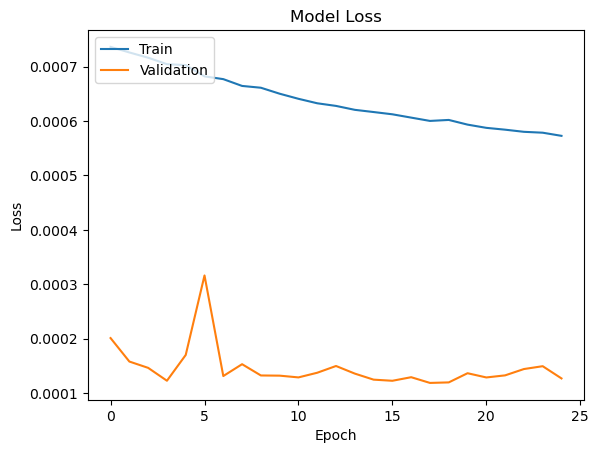

In [81]:
import matplotlib.pyplot as plt

plt.plot(history_e2d2_batch_128_24in.history['loss'])
plt.plot(history_e2d2_batch_128_24in.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [82]:
pred_e2d2_batch_128_24in=model_e2d2_batch_128_24in.predict(X_test)

436/436 [==============================] - 25s 53ms/step


In [83]:
for index,i in enumerate(train_merged.columns):
    scaler = scalers_Acomb['scaler_'+i]
    pred_e2d2_batch_128_24in[:,:,index]=scaler.inverse_transform(pred_e2d2_batch_128_24in[:,:,index])
    y_train[:,:,index]=scaler.inverse_transform(y_train[:,:,index])
    y_test[:,:,index]=scaler.inverse_transform(y_test[:,:,index])
    y_valid[:,:,index]=scaler.inverse_transform(y_valid[:,:,index])

In [84]:
def calculate_nse(y_true, y_pred):
    
    return 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)

for index, i in enumerate(train_merged.columns):
    print(i)
    for j in range(1, 49):
        print("time ", j, ":")
        mae_128_24in = mean_absolute_error(y_test[:, j - 1, index], pred_e2d2_batch_128_24in[:, j - 1, index])
        mse_128_24in = mean_squared_error(y_test[:, j - 1, index], pred_e2d2_batch_128_24in[:, j - 1, index])
        nse_128_24in = calculate_nse(y_test[:, j - 1, index], pred_e2d2_batch_128_24in[:, j - 1, index])
        print("MAE: ", mae_128_24in)
        print("MSE: ", mse_128_24in)
        print("NSE: ", nse_128_24in)
    print()

value_x
time  1 :
MAE:  8.706208149453035
MSE:  75.81531188393858
NSE:  -4131.099173660534
time  2 :
MAE:  8.709753511818072
MSE:  75.87729226574417
NSE:  -4134.47723909452
time  3 :
MAE:  8.734894330836976
MSE:  76.31619071673208
NSE:  -4158.398157990485
time  4 :
MAE:  8.766188371634527
MSE:  76.86431204275245
NSE:  -4188.271960815193
time  5 :
MAE:  8.795376643945783
MSE:  77.3774326939053
NSE:  -4216.238150835788
time  6 :
MAE:  8.818812298552473
MSE:  77.79082910525774
NSE:  -4238.769153179465
time  7 :
MAE:  8.835563890448126
MSE:  78.08719361084196
NSE:  -4254.921662457558
time  8 :
MAE:  8.846143726760271
MSE:  78.27488365933885
NSE:  -4265.15117777612
time  9 :
MAE:  8.851709482971742
MSE:  78.37397702528921
NSE:  -4270.551981457908
time  10 :
MAE:  8.853589209377825
MSE:  78.407802996729
NSE:  -4272.395570373675
time  11 :
MAE:  8.853020640047314
MSE:  78.39822154796119
NSE:  -4271.873360604274
time  12 :
MAE:  8.851029294972848
MSE:  78.36338972316351
NSE:  -4269.97495049572

In [85]:
n_past = 48
n_future = 48 
n_features = 2
X_train, y_train = split(train_Acomb.values,n_past, n_future)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1],n_features))
y_train = y_train.reshape((y_train.shape[0], y_train.shape[1], n_features))
X_test, y_test = split(test_Acomb.values,n_past, n_future)
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1],n_features))
y_test = y_test.reshape((y_test.shape[0], y_test.shape[1], n_features))
X_valid, y_valid = split(valid_Acomb.values,n_past, n_future)
X_valid = X_valid.reshape((X_valid.shape[0], X_valid.shape[1],n_features))
y_valid = y_valid.reshape((y_valid.shape[0], y_valid.shape[1], n_features))

In [86]:
e_in = tf.keras.layers.Input(shape=(n_past, n_features))
e_l1 = tf.keras.layers.LSTM(100,return_sequences = True, return_state=True)
e_outs1 = e_l1(e_in)
e_states1 = e_outs1[1:]
e_l2 = tf.keras.layers.LSTM(100, return_state=True)
e_outs2 = e_l2(e_outs1[0])
e_states2 = e_outs2[1:]

d_in = tf.keras.layers.RepeatVector(n_future)(e_outs2[0])

d_l1 = tf.keras.layers.LSTM(100, return_sequences=True)(d_in,initial_state = e_states1)
d_l2 = tf.keras.layers.LSTM(100, return_sequences=True)(d_l1,initial_state = e_states2)
d_outs2 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(n_features))(d_l2)

model_e2d2_batch_128_48in_v2 = tf.keras.models.Model(e_in,d_outs2)

In [87]:
model_e2d2_batch_128_48in_v2.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.Huber())
history_e2d2_batch_128_48in_v2=model_e2d2_batch_128_48in_v2.fit(X_train,y_train,epochs=100,validation_data=(X_valid,y_valid),batch_size=128,verbose=1,callbacks=[reduce_learning_rate])

Epoch 1/100
876/876 [==============================] - 441s 492ms/step - loss: 0.0028 - val_loss: 3.5155e-04 - lr: 0.0010
Epoch 2/100
876/876 [==============================] - 442s 505ms/step - loss: 0.0010 - val_loss: 1.4078e-04 - lr: 9.0000e-04
Epoch 3/100
876/876 [==============================] - 439s 502ms/step - loss: 9.4927e-04 - val_loss: 3.2165e-04 - lr: 8.1000e-04
Epoch 4/100
876/876 [==============================] - 436s 498ms/step - loss: 9.0911e-04 - val_loss: 2.9448e-04 - lr: 7.2900e-04
Epoch 5/100
876/876 [==============================] - 437s 499ms/step - loss: 8.6495e-04 - val_loss: 2.4841e-04 - lr: 6.5610e-04
Epoch 6/100
876/876 [==============================] - 436s 498ms/step - loss: 8.2250e-04 - val_loss: 1.3804e-04 - lr: 5.9049e-04
Epoch 7/100
876/876 [==============================] - 437s 499ms/step - loss: 7.9839e-04 - val_loss: 2.0016e-04 - lr: 5.3144e-04
Epoch 8/100
876/876 [==============================] - 434s 495ms/step - loss: 7.8920e-04 - val_loss: 

Epoch 64/100
876/876 [==============================] - 439s 502ms/step - loss: 6.3096e-04 - val_loss: 1.1738e-04 - lr: 1.3100e-06
Epoch 65/100
876/876 [==============================] - 441s 503ms/step - loss: 6.3079e-04 - val_loss: 1.1650e-04 - lr: 1.1790e-06
Epoch 66/100
876/876 [==============================] - 394s 450ms/step - loss: 6.3041e-04 - val_loss: 1.1615e-04 - lr: 1.0611e-06
Epoch 67/100
876/876 [==============================] - 346s 395ms/step - loss: 6.3046e-04 - val_loss: 1.1874e-04 - lr: 9.5500e-07
Epoch 68/100
876/876 [==============================] - 352s 402ms/step - loss: 6.3041e-04 - val_loss: 1.1580e-04 - lr: 8.5950e-07
Epoch 69/100
876/876 [==============================] - 347s 396ms/step - loss: 6.3033e-04 - val_loss: 1.1758e-04 - lr: 7.7355e-07
Epoch 70/100
876/876 [==============================] - 348s 397ms/step - loss: 6.3011e-04 - val_loss: 1.1821e-04 - lr: 6.9620e-07
Epoch 71/100
876/876 [==============================] - 349s 398ms/step - loss: 6.3

In [88]:
with open('history_e2d2_batch_128_48in_v2.pkl', 'wb') as file:
    pickle.dump(history_e2d2_batch_128_48in_v2.history, file)

In [89]:
from keras.models import load_model
model_e2d2_batch_128_48in_v2.save('model_e2d2_batch_128_48in_v2.h5')

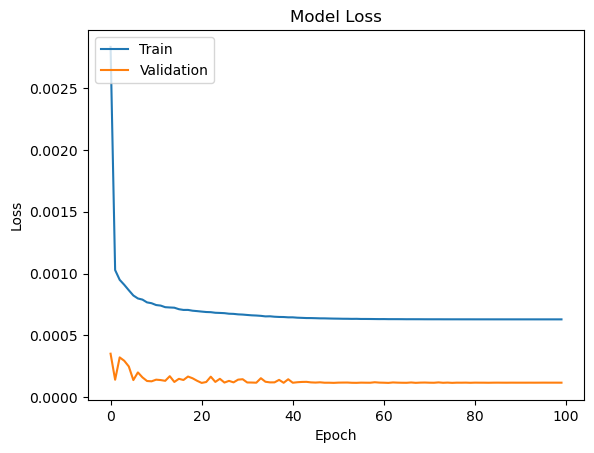

In [90]:
import matplotlib.pyplot as plt

plt.plot(history_e2d2_batch_128_48in_v2.history['loss'])
plt.plot(history_e2d2_batch_128_48in_v2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [91]:
pred_e2d2_batch_128_48in_v2=model_e2d2_batch_128_48in_v2.predict(X_test)

436/436 [==============================] - 33s 71ms/step


In [92]:
for index,i in enumerate(train_merged.columns):
    scaler = scalers_Acomb['scaler_'+i]
    pred_e2d2_batch_128_48in_v2[:,:,index]=scaler.inverse_transform(pred_e2d2_batch_128_48in_v2[:,:,index])
    y_train[:,:,index]=scaler.inverse_transform(y_train[:,:,index])
    y_test[:,:,index]=scaler.inverse_transform(y_test[:,:,index])
    y_valid[:,:,index]=scaler.inverse_transform(y_valid[:,:,index])

In [93]:
def calculate_nse(y_true, y_pred):
    
    return 1 - np.sum((y_true - y_pred) ** 2) / np.sum((y_true - np.mean(y_true)) ** 2)

for index, i in enumerate(train_merged.columns):
    print(i)
    for j in range(1, 49):
        print("time ", j, ":")
        mae_128_48in = mean_absolute_error(y_test[:, j - 1, index], pred_e2d2_batch_128_48in_v2[:, j - 1, index])
        mse_128_48in = mean_squared_error(y_test[:, j - 1, index], pred_e2d2_batch_128_48in_v2[:, j - 1, index])
        nse_128_48in = calculate_nse(y_test[:, j - 1, index], pred_e2d2_batch_128_48in_v2[:, j - 1, index])
        print("MAE: ", mae_128_48in)
        print("MSE: ", mse_128_48in)
        print("NSE: ", nse_128_48in)
    print()

value_x
time  1 :
MAE:  0.04597238450222022
MSE:  0.015742452541172576
NSE:  0.14342559818533707
time  2 :
MAE:  0.04226601724817567
MSE:  0.01476042704307518
NSE:  0.1968593246901188
time  3 :
MAE:  0.034315882020352656
MSE:  0.01469489566674032
NSE:  0.20042500159702492
time  4 :
MAE:  0.035975832183693275
MSE:  0.01522202844836844
NSE:  0.1717427841395427
time  5 :
MAE:  0.03849642014466486
MSE:  0.015469892063928242
NSE:  0.15825609090197545
time  6 :
MAE:  0.03890762233045344
MSE:  0.01573588676605358
NSE:  0.14378285350373765
time  7 :
MAE:  0.03835343120542227
MSE:  0.015986287531564412
NSE:  0.13015810949574969
time  8 :
MAE:  0.03764086886087022
MSE:  0.016109281106763382
NSE:  0.12346581375418308
time  9 :
MAE:  0.037221505740790174
MSE:  0.016145632552932002
NSE:  0.1214878679305863
time  10 :
MAE:  0.0372279113282217
MSE:  0.016219157886892877
NSE:  0.11748722579486792
time  11 :
MAE:  0.037563879912941064
MSE:  0.01631354704277146
NSE:  0.11235134658398704
time  12 :
MAE: 